# CENSUS INCOME PREDICTION 

## Importing Libreries

In [249]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [250]:
#Import the dataset

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [251]:
data.shape

(32560, 15)

There are 32560 Rows and 15 Columns in dataset

## Detailed description

In [252]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

# Datatypes of all columns

In [253]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We have Integer data type ----> Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week. 

object datatypes ----> Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, Income

all are independent variable accept Income. Income is a target variable.

# Checking is there any null value

In [254]:
#check is there any null value present in any column

data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing value in dataset. Its safe to proceed further

## Visualization of null values

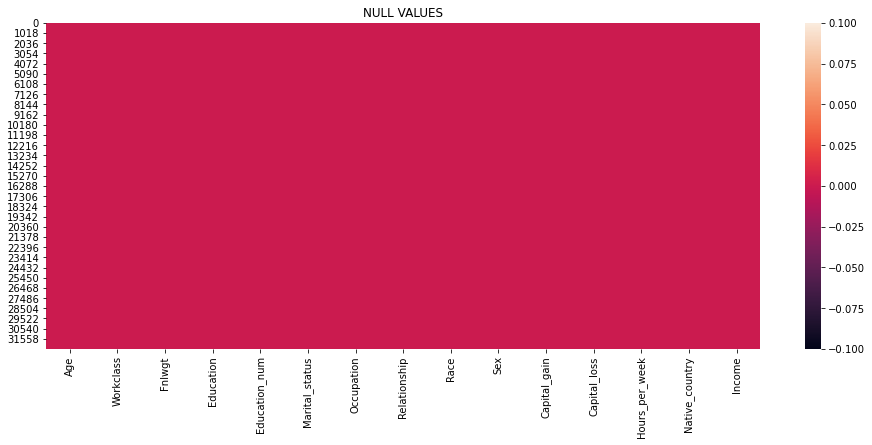

In [255]:
plt.figure(figsize=[16,6])
sn.heatmap(data.isnull())
plt.title("NULL VALUES")
plt.show()

no null values present in whole dataset

## Before visualization we need to convert target variable to integer data type

In [256]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [257]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [258]:
# Replace Attrition column to binary encoder
data['Income'] = data['Income'].replace({' <=50K':0, ' >50K':1})

after converting target variable the >50K will become 1 and <=50K will become 0.

In [259]:
data['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [260]:
fe = data[["Age", "Fnlwgt", "Education_num", "Capital_gain", "Capital_loss", "Hours_per_week", "Income"]]

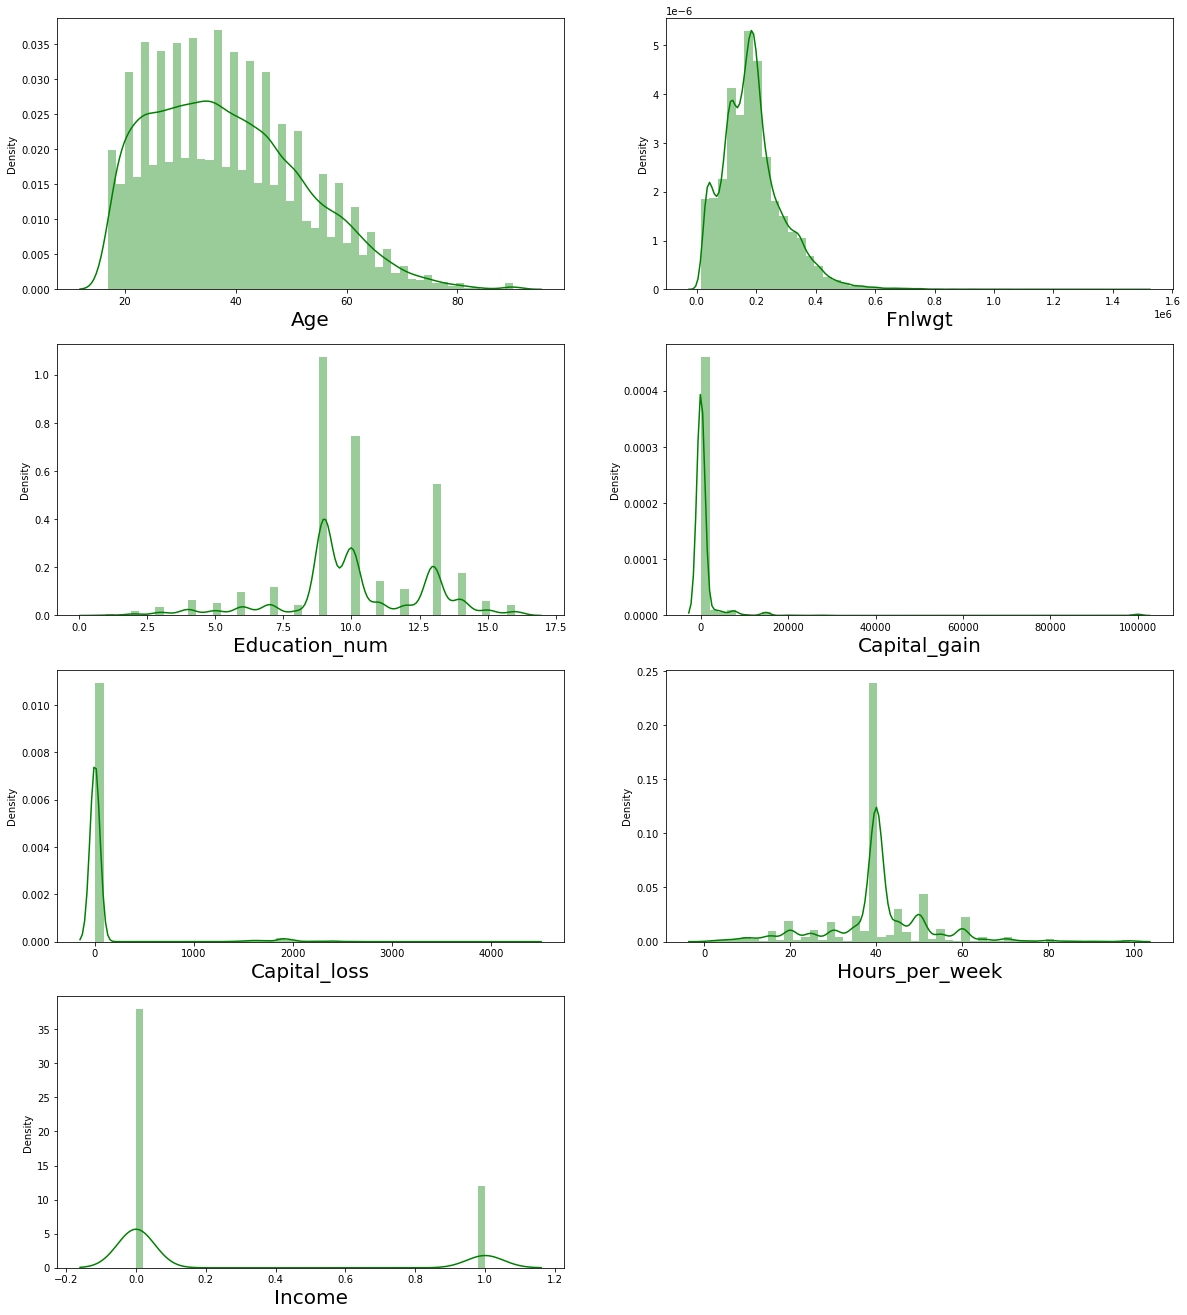

In [261]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot almost every input variable is having skewness in it ().
Data columns are not normally distributed. So, we need remove skewness from all the input variable.

Income is a targate variable and it is having two classes. so, it is a binaryclassification problem.

### Analysis through boxplot

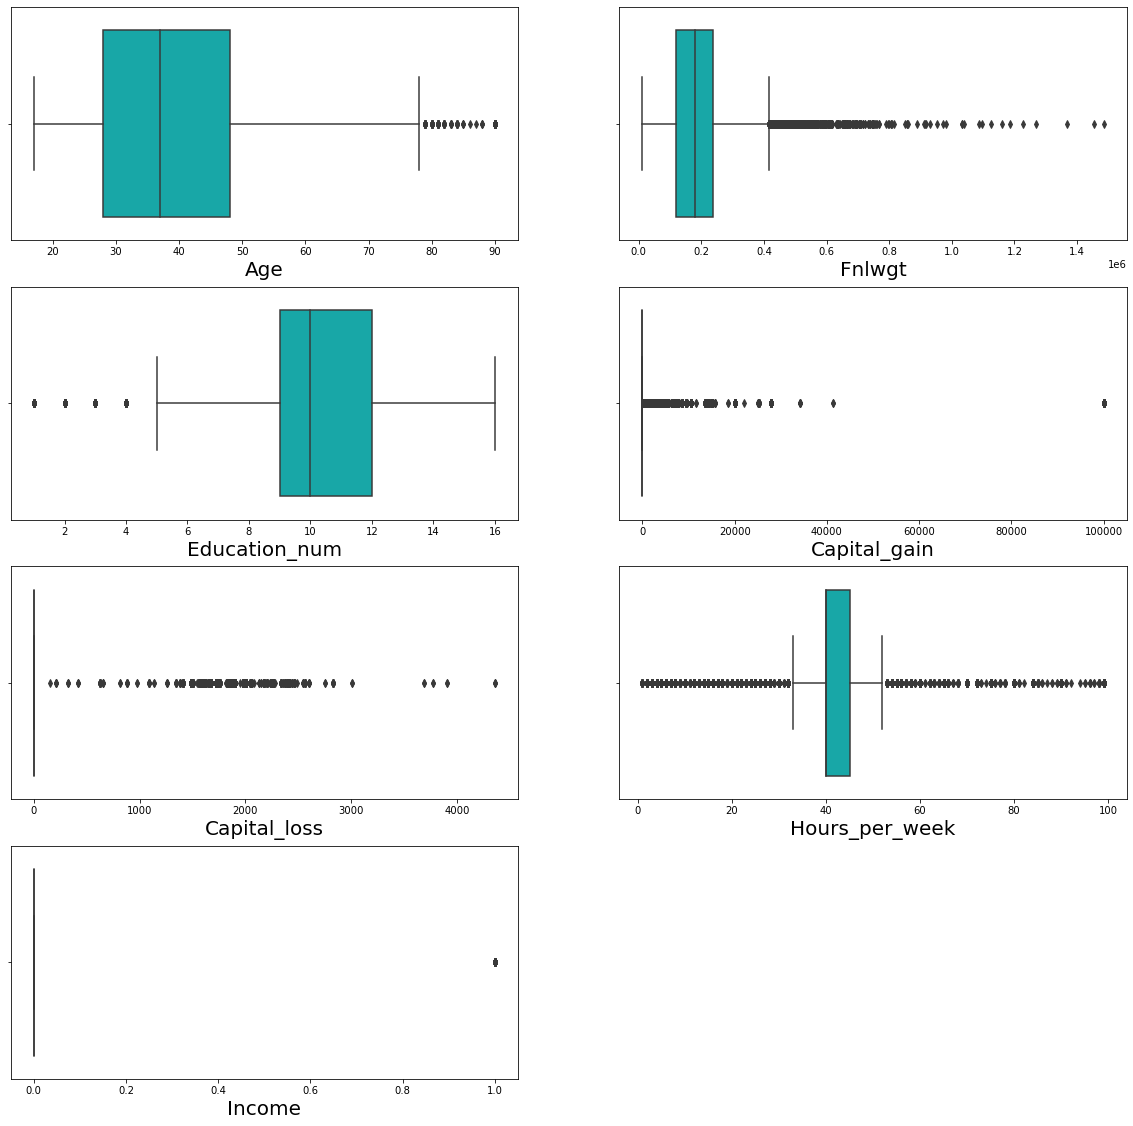

In [262]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are therteen columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we can see all columns are having outliers in it, so we need to treat tham too.

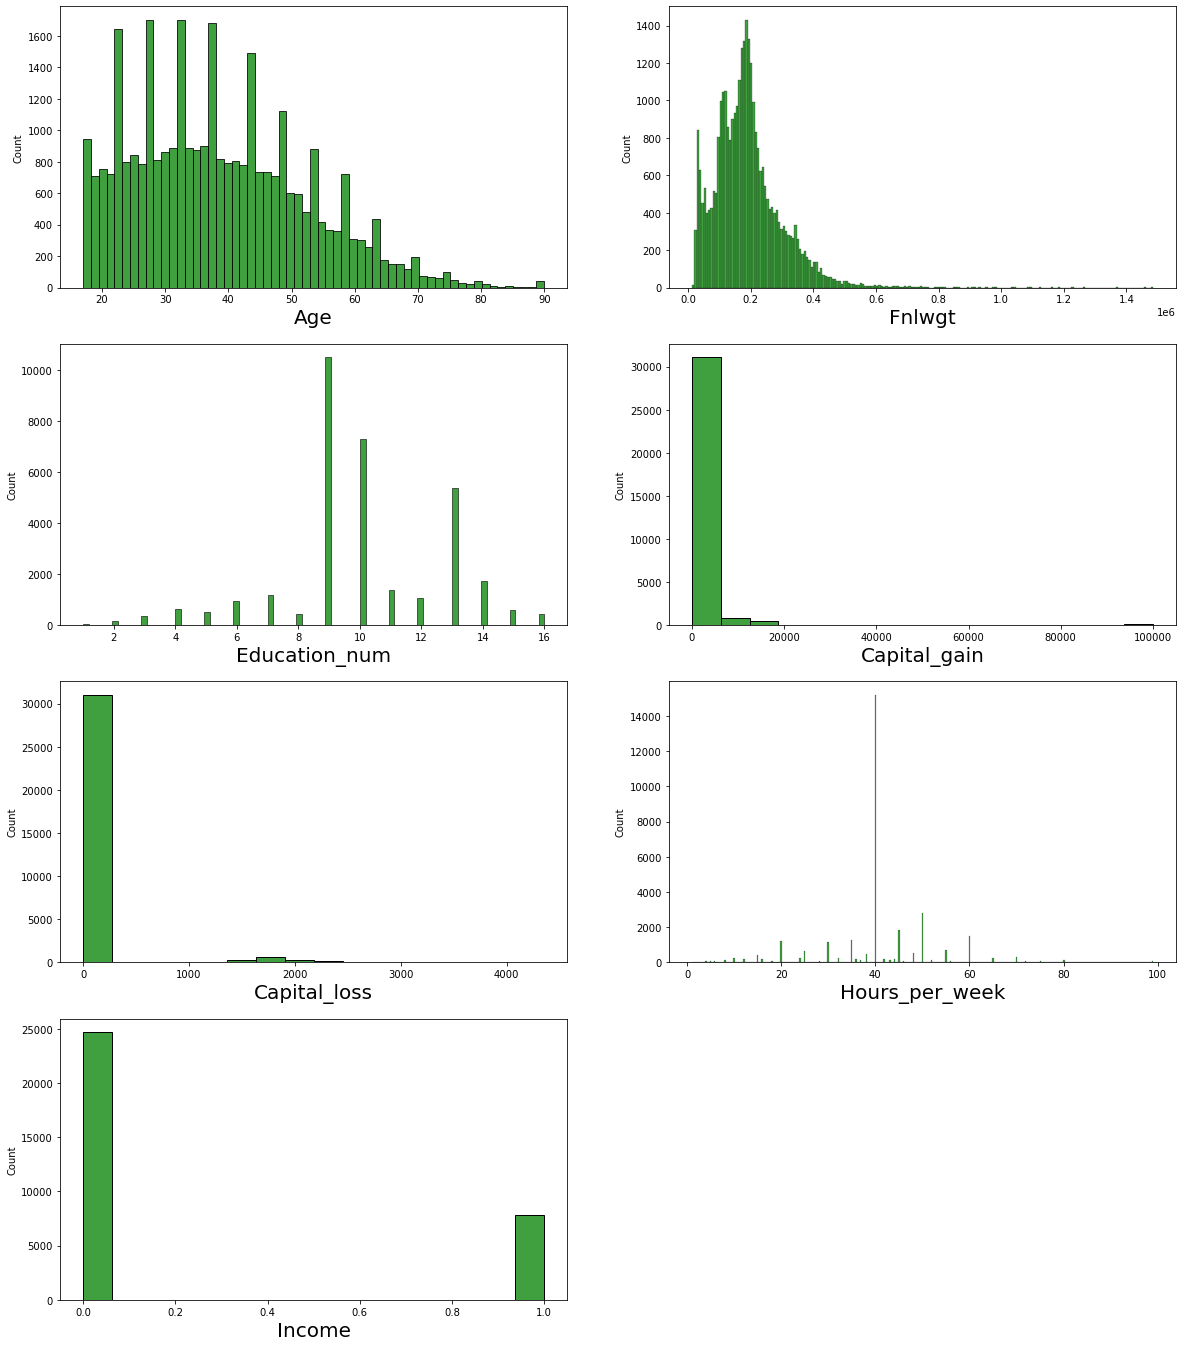

In [263]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are thirtheen columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in histplot almost every input variable is having skewness in it ().
Data columns are not normally distributed. So, we need remove skewness from all the input variable.

## Bi variate analysis
Bi variate analysis is works with two variables.

In [264]:
feature = data[["Age", "Fnlwgt", "Education_num", "Capital_gain", "Capital_loss", "Hours_per_week", "Income"]]

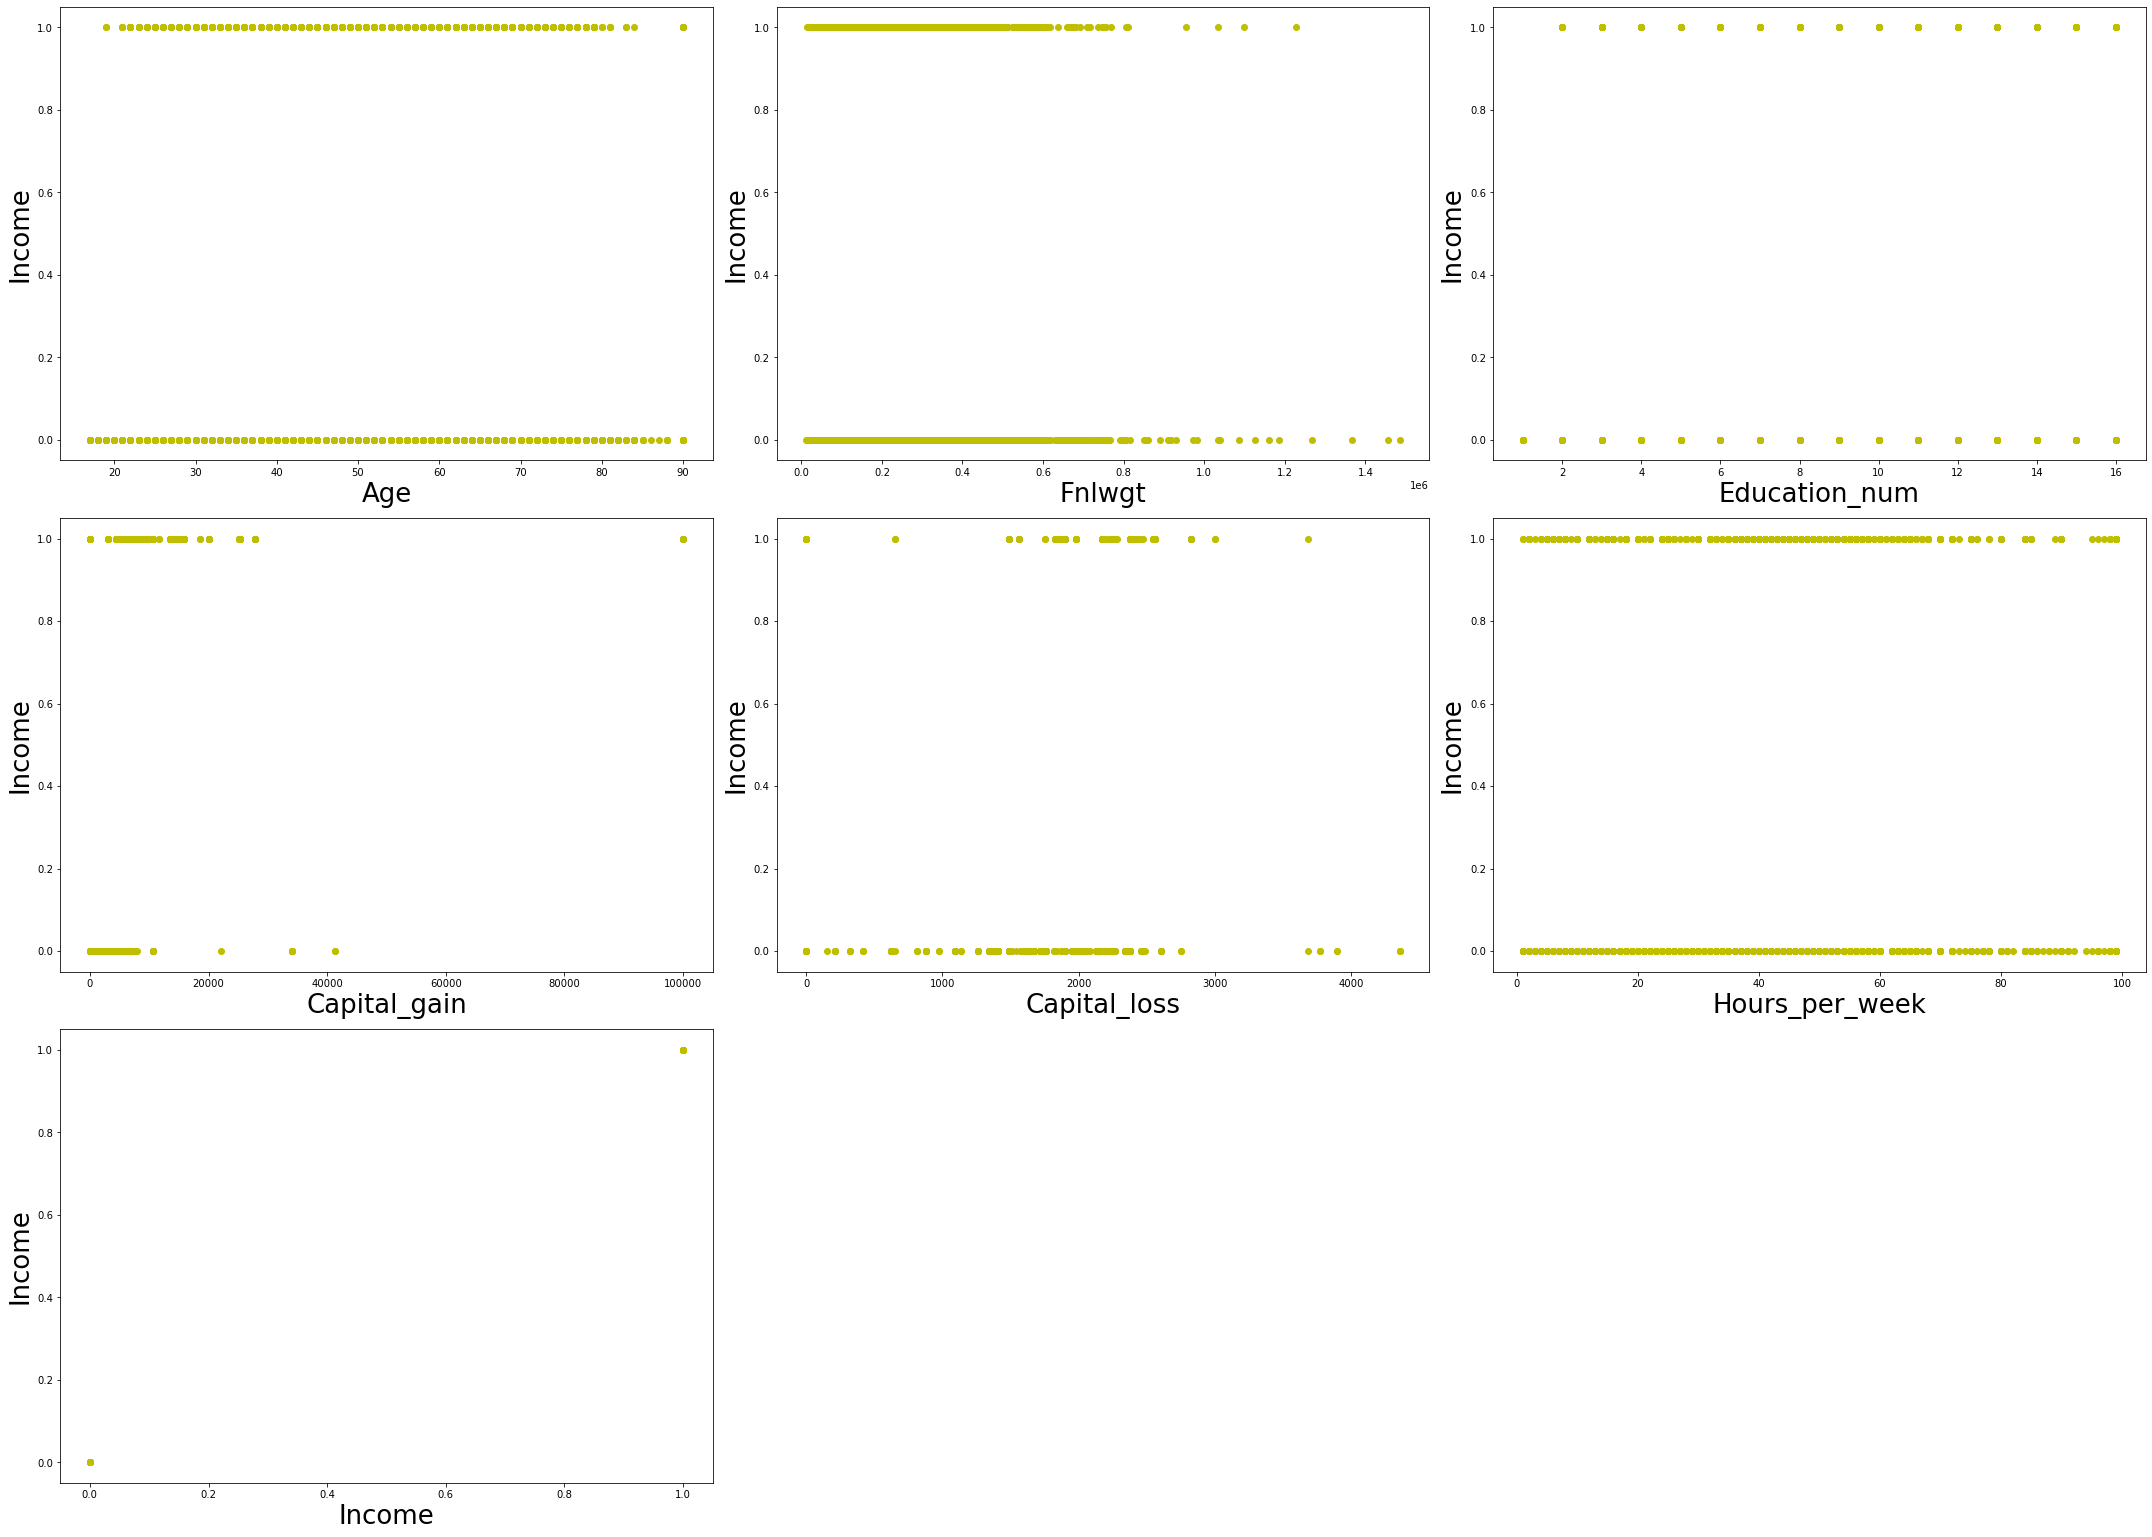

In [265]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['Income'], color='y')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Income', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

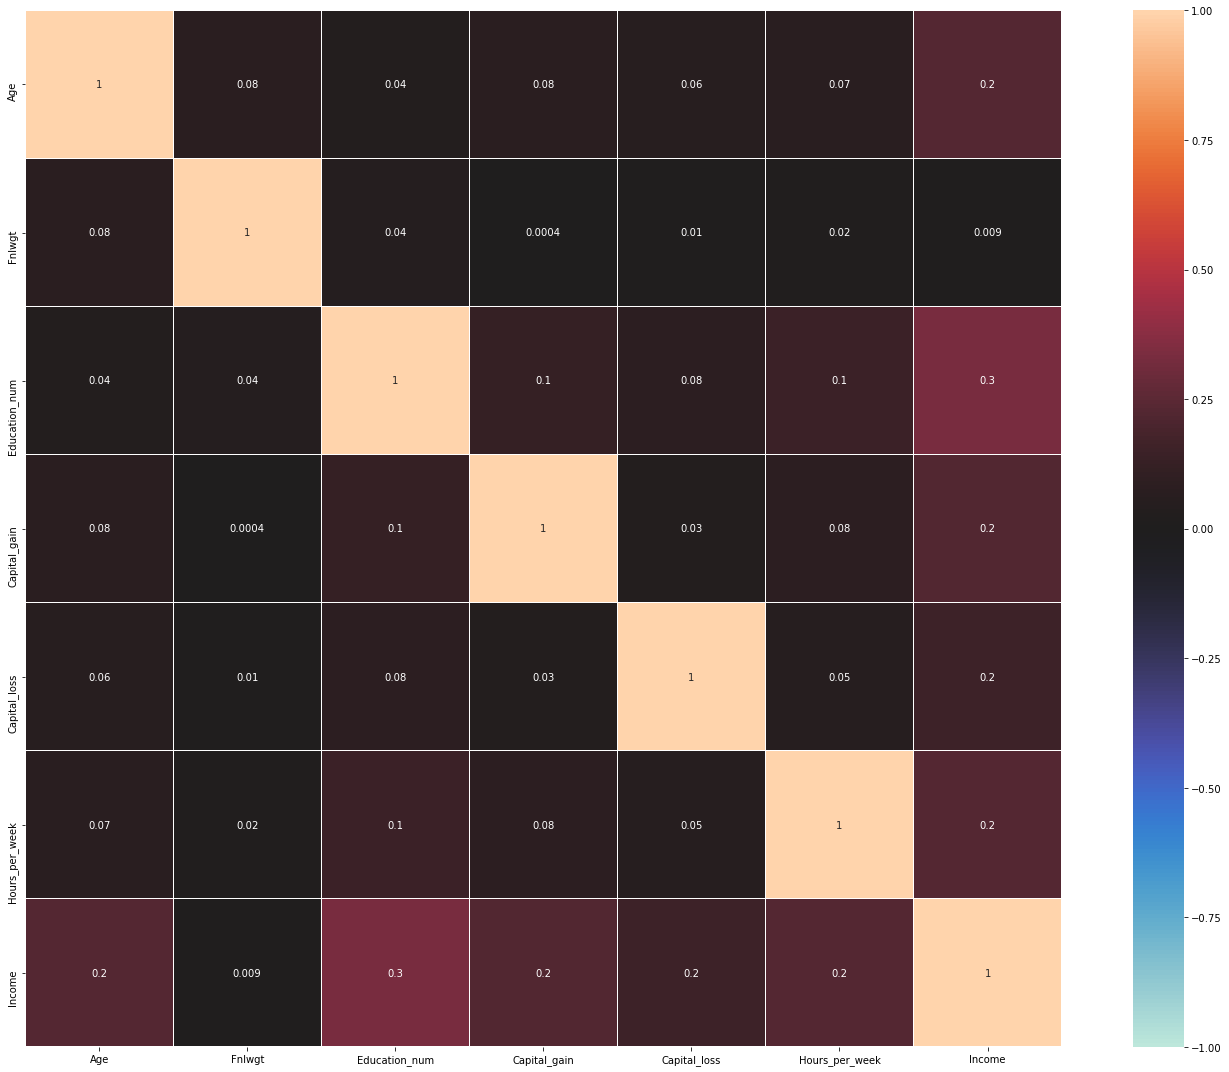

In [266]:
data_cor = data.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot 'income' and 'fnlwgt' are poorly correlated.
and target variable strongly correlated with Education_num.

##### Find out which columns are positively and negatively correlated with each other

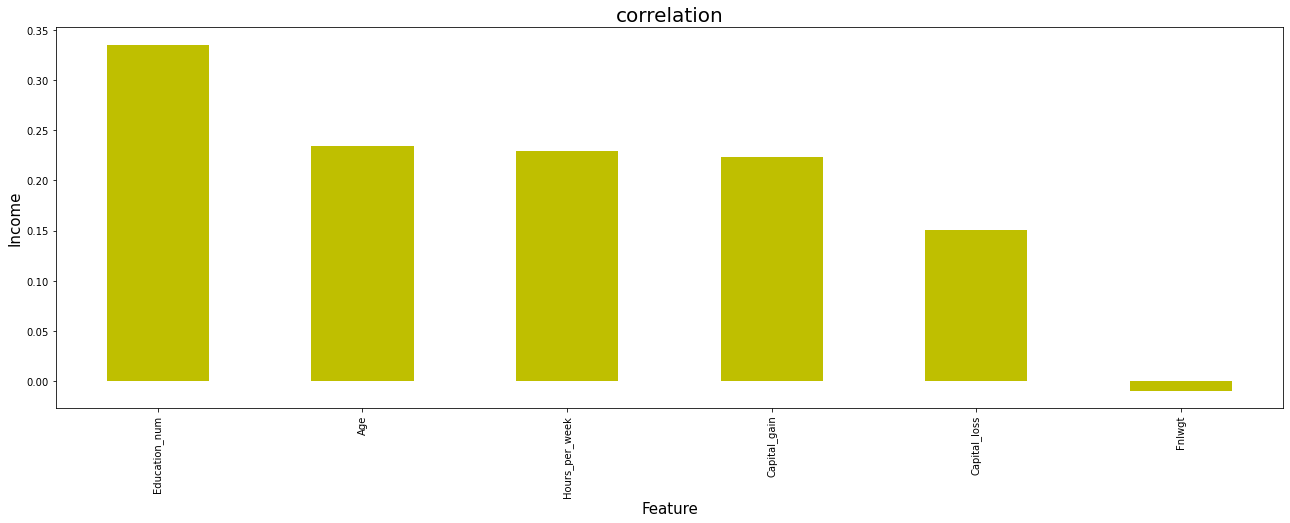

In [267]:
plt.figure(figsize=(22,7))
data.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Income', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

as we have saw in the plot fnlwgt and target variable is having very less correlation with each other. 

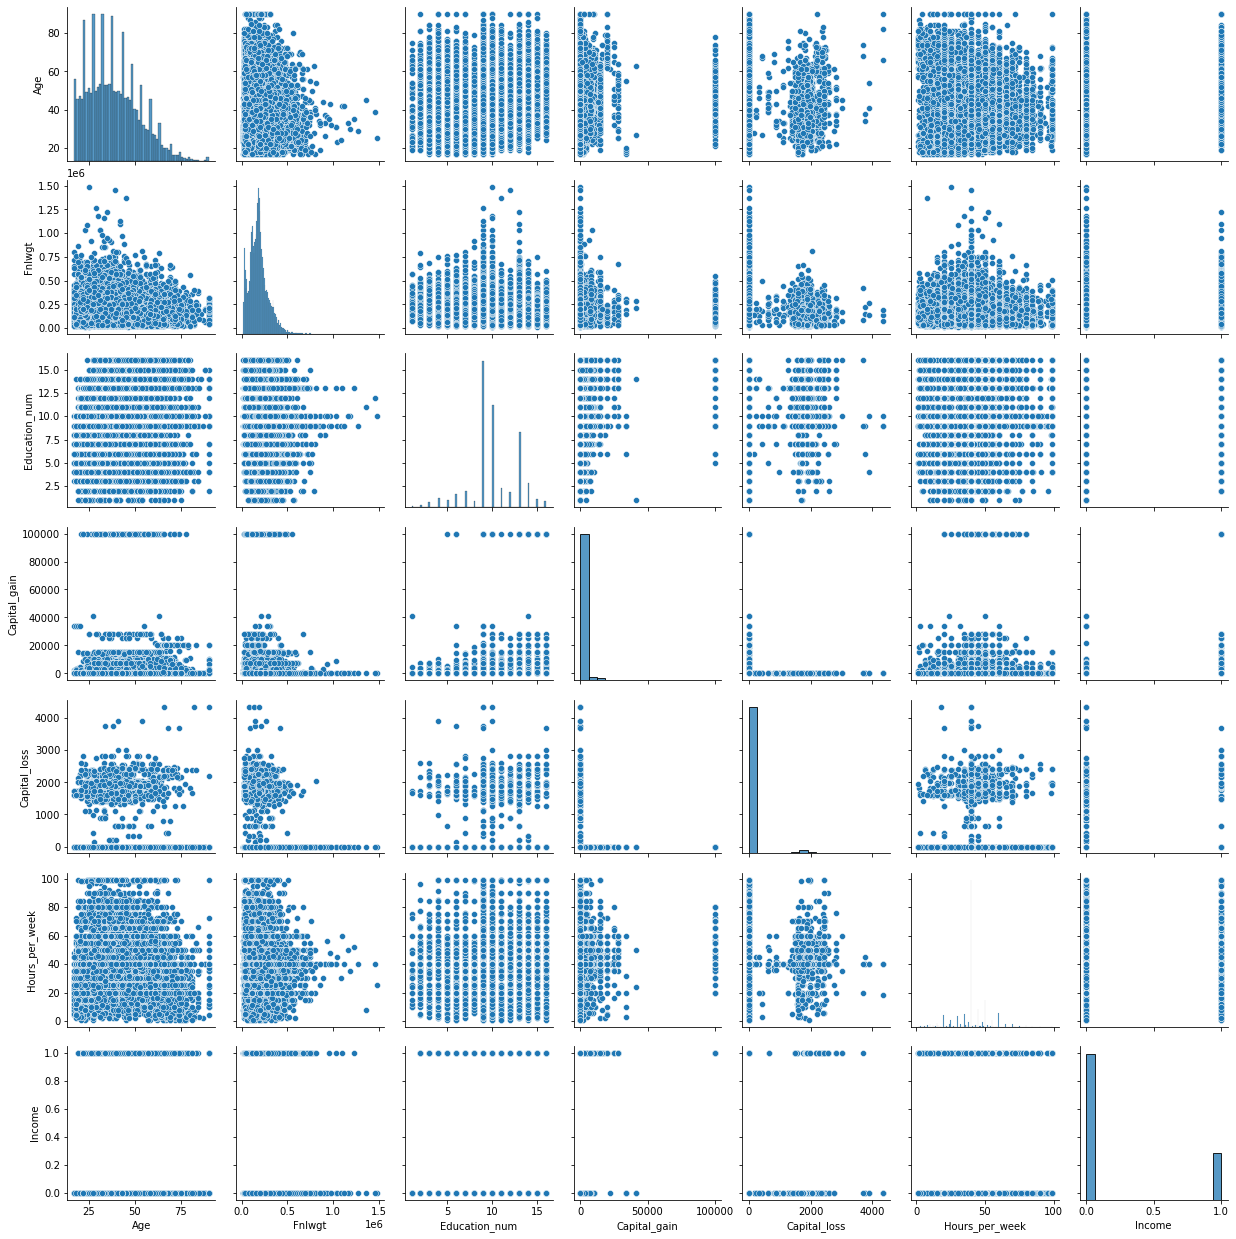

In [268]:
sn.pairplot(data)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

## Encoding/Droping 

In [269]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


#### 1. Drop Loan_ID column

In [270]:
# Check unique values of Workclass column
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [271]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [272]:
# Check unique values of Education column
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [273]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [274]:
# Check unique values of Marital_status column
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [275]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [276]:
# Check unique values of Occupation column
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [277]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [278]:
# Check unique values of Race column
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [279]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [280]:
27815/32560

0.8542690417690417

as shown in above 85% values are same in race column so we can drop that column

In [281]:
#drop Race column
data=data.drop(['Race'], axis=1)

In [282]:
# Check unique values of Sex column
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [283]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [284]:
21789/32560

0.6691953316953317

In [285]:
# Check unique values of Native_country column
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [286]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [287]:
29169/32560

0.8958538083538083

as shown in above 89% values are same in Native_country column so we can drop that column

In [288]:
#drop Native_country column
data=data.drop(['Native_country'], axis=1)

### Encoding all columns with label encoder

In [289]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [290]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i].values.reshape(-1,1))

as we can see in loan id columns all values are having unique count, so we can drop that column.

In [291]:
data.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Income            int64
dtype: object

all object datatype column encoded.

## Visualization of all input variables correlation with targate variable

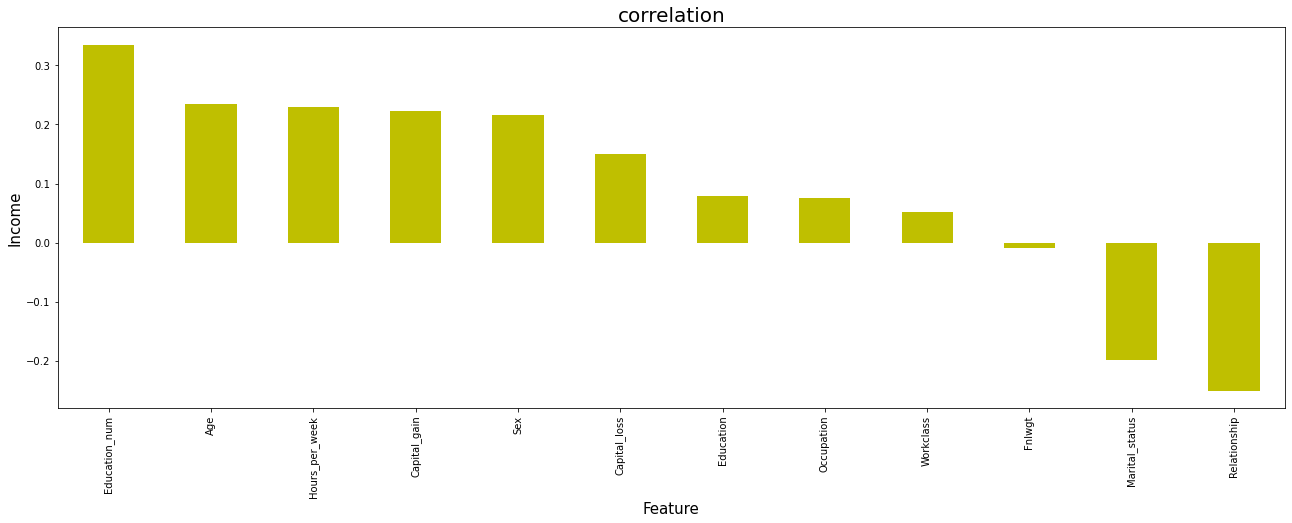

In [292]:
plt.figure(figsize=(22,7))
data.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Income', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

In [293]:
#drop Fnlwgt column because poor correlation with target variable
data=data.drop(['Fnlwgt'], axis=1)

In [294]:
data

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,13,2,4,0,1,0,0,13,0
1,38,4,11,9,0,6,1,1,0,0,40,0
2,53,4,1,7,2,6,0,1,0,0,40,0
3,28,4,9,13,2,10,5,0,0,0,40,0
4,37,4,12,14,2,4,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,0,0,0,38,0
32556,40,4,11,9,2,7,0,1,0,0,40,1
32557,58,4,11,9,6,1,4,0,0,0,40,0
32558,22,4,11,9,4,1,3,1,0,0,20,0


# Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [295]:
data.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,10.298249,10.080590,2.611794,6.572912,1.446376,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,3.870317,2.572709,1.506225,4.228809,1.606794,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [296]:
data.dtypes

Age               int64
Workclass         int32
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Income            int64
dtype: object

## 1.Outlier removal using Zscore

In [297]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(data[['Age','Capital_gain', 'Capital_loss', 'Hours_per_week']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_data = data[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", new_data.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-new_data.shape[0])/data.shape[0])

shape before and after
shape before         : (32560, 12)
shape after          : (30356, 12)
Percentage Loss      : 0.06769041769041768


6.76% data loss after using Zscore technique

In [298]:
30356/32560*100

93.23095823095822

93.23% data remains.

In [299]:
new_data.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000,30356.000000
mean,38.153907,3.862432,10.279813,10.018250,2.625049,6.550863,1.479016,0.661517,567.099157,1.188332,39.879101,0.221768
std,13.365504,1.445610,3.899331,2.539258,1.514552,4.229344,1.608920,0.473202,2324.905790,32.426197,11.132686,0.415443
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,27.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,79.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,22040.000000,1258.000000,77.000000,1.000000


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [300]:
data2 = data

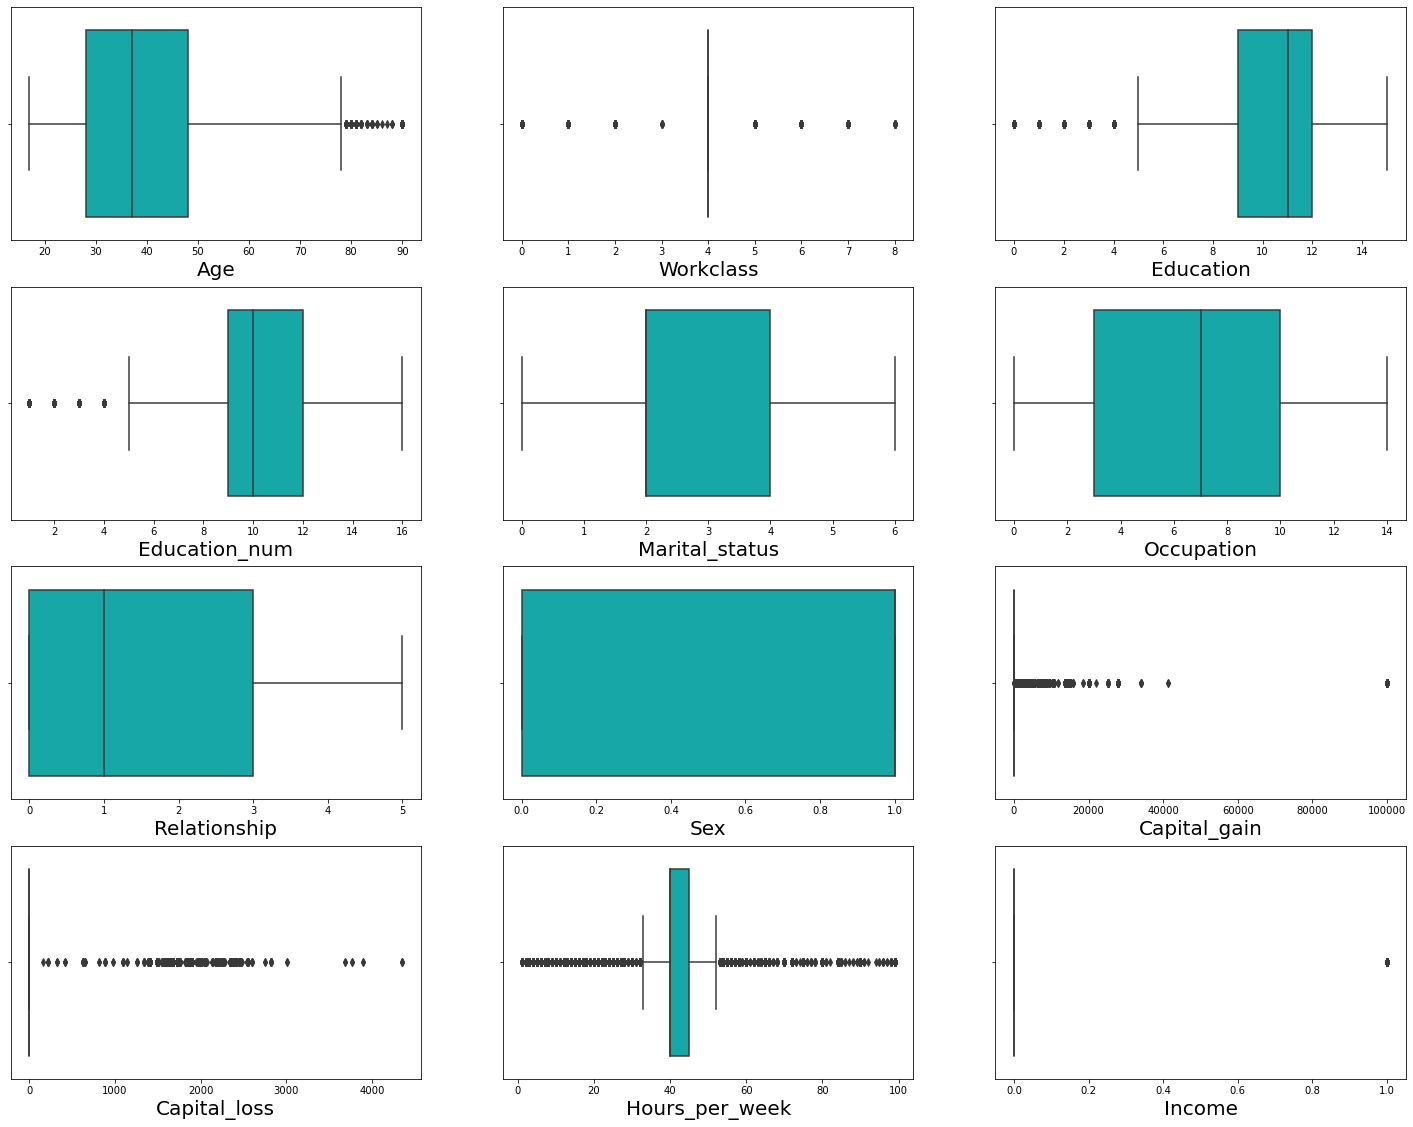

In [301]:
plt.figure(figsize=(25,30))
graph = 1

for column in data2:
    if graph <= 15:
        ax = plt.subplot(6,3, graph)
        sn.boxplot(data[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

#### check wheather the variables are contineous in nature as well as they are having outliers in it, after that remove that outliers of contineous data. 

#### contioeous data columns are ----> 'Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week'
all above contineous data is having outliers in it.

In [302]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [303]:
data2.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,10.298249,10.080590,2.611794,6.572912,1.446376,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,3.870317,2.572709,1.506225,4.228809,1.606794,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [304]:
#as shown in boxplot we have outlier in higher side of Age 
#Remove outliers from higher side so, use higher side formula

Age_out = (q3.Age + (1.5*(iqr.Age)))
Age_out

78.0

In [305]:
index_out = np.where(data2['Age'] > Age_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0,50,6,9,13,2,4,0,1,0,0,13,0
1,1,38,4,11,9,0,6,1,1,0,0,40,0
2,2,53,4,1,7,2,6,0,1,0,0,40,0
3,3,28,4,9,13,2,10,5,0,0,0,40,0
4,4,37,4,12,14,2,4,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,4,7,12,2,13,5,0,0,0,38,0
32413,32556,40,4,11,9,2,7,0,1,0,0,40,1
32414,32557,58,4,11,9,6,1,4,0,0,0,40,0
32415,32558,22,4,11,9,4,1,3,1,0,0,20,0


after removing outliers from Age 32417 rows will remains in dataframe.

In [306]:
#as shown in boxplot we have outlier in higher side of Capital_gain 
#Remove outliers from higher side so, use higher side formula

Capital_gain_out = (q3.Capital_gain + (1.5*(iqr.Capital_gain)))
Capital_gain_out

0.0

In [307]:
index_out = np.where(data2['Capital_gain'] > Capital_gain_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0,50,6,9,13,2,4,0,1,0,0,13,0
1,1,38,4,11,9,0,6,1,1,0,0,40,0
2,2,53,4,1,7,2,6,0,1,0,0,40,0
3,3,28,4,9,13,2,10,5,0,0,0,40,0
4,4,37,4,12,14,2,4,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29721,32554,22,4,15,10,4,11,1,1,0,0,40,0
29722,32555,27,4,7,12,2,13,5,0,0,0,38,0
29723,32556,40,4,11,9,2,7,0,1,0,0,40,1
29724,32557,58,4,11,9,6,1,4,0,0,0,40,0


after removing outliers from LoanAmount 29726 rows will remains in dataframe.

In [308]:
#as shown in boxplot we have outlier in higher side of Capital_loss 
#Remove outliers from higher side so, use higher side formula

Capital_loss_out = (q3.Capital_loss + (1.5*(iqr.Capital_loss)))
Capital_loss_out

0.0

In [309]:
index_out = np.where(data2['Capital_loss'] > Capital_loss_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0,50,6,9,13,2,4,0,1,0,0,13,0
1,1,38,4,11,9,0,6,1,1,0,0,40,0
2,2,53,4,1,7,2,6,0,1,0,0,40,0
3,3,28,4,9,13,2,10,5,0,0,0,40,0
4,4,37,4,12,14,2,4,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,32554,22,4,15,10,4,11,1,1,0,0,40,0
28210,32555,27,4,7,12,2,13,5,0,0,0,38,0
28211,32556,40,4,11,9,2,7,0,1,0,0,40,1
28212,32557,58,4,11,9,6,1,4,0,0,0,40,0


after removing outliers from Capital_loss 28214 rows will remains in dataframe.

In [310]:
#Check the Outliers for Hours_per_week
#Remove outliers from lower side so, use lower side formula

Hours_per_week_out = (q3.Hours_per_week + (1.5*(iqr.Hours_per_week)))
Hours_per_week_out

52.5

In [311]:
index_out = np.where(data2['Hours_per_week'] > Hours_per_week_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0,50,6,9,13,2,4,0,1,0,0,13,0
1,1,38,4,11,9,0,6,1,1,0,0,40,0
2,2,53,4,1,7,2,6,0,1,0,0,40,0
3,3,28,4,9,13,2,10,5,0,0,0,40,0
4,4,37,4,12,14,2,4,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25402,32554,22,4,15,10,4,11,1,1,0,0,40,0
25403,32555,27,4,7,12,2,13,5,0,0,0,38,0
25404,32556,40,4,11,9,2,7,0,1,0,0,40,1
25405,32557,58,4,11,9,6,1,4,0,0,0,40,0


In [312]:
#Check the Outliers for Hours_per_week
#Remove outliers from lower side so, use lower side formula

Hours_per_week_out = (q1.Hours_per_week - (1.5*(iqr.Hours_per_week)))
Hours_per_week_out

32.5

In [313]:
index_out = np.where(data2['Hours_per_week'] < Hours_per_week_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,1,38,4,11,9,0,6,1,1,0,0,40,0
1,2,53,4,1,7,2,6,0,1,0,0,40,0
2,3,28,4,9,13,2,10,5,0,0,0,40,0
3,4,37,4,12,14,2,4,5,0,0,0,40,0
4,6,52,6,11,9,2,4,0,1,0,0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20390,32553,53,4,12,14,2,4,0,1,0,0,40,1
20391,32554,22,4,15,10,4,11,1,1,0,0,40,0
20392,32555,27,4,7,12,2,13,5,0,0,0,38,0
20393,32556,40,4,11,9,2,7,0,1,0,0,40,1


after removing outliers from Hours_per_week 20395 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are  20395  rows will remains in dataset.
Now, find how much data loss in IQR method

In [314]:
((32560- 20395)/32560) * 100

37.361793611793615

37.36% data loss in IQR method

In [315]:
( 20395/32560)*100

62.638206388206385

62.63% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

In [316]:
data2.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.0,20395.0,20395.000000,20395.000000
mean,38.159206,3.866095,10.303064,9.976514,2.543761,6.426134,1.425595,0.674479,0.0,0.0,41.437656,0.204462
std,12.145311,1.363143,3.746619,2.502874,1.517537,4.184768,1.600141,0.468581,0.0,0.0,3.934403,0.403318
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,33.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.0,40.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,6.000000,1.000000,1.000000,0.0,0.0,40.000000,0.000000
75%,47.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,1.000000,0.0,0.0,40.000000,0.000000
max,78.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,0.0,0.0,52.000000,1.000000


## Check the skewness and remove that

In [317]:
new_data.skew()

Age                0.492039
Workclass         -0.747931
Education         -0.926650
Education_num     -0.327125
Marital_status    -0.049122
Occupation         0.121813
Relationship       0.744606
Sex               -0.682700
Capital_gain       4.955455
Capital_loss      29.923969
Hours_per_week    -0.351580
Income             1.339534
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range as well as they are contineous in nature.

1. Capital_gain
2. Capital_loss

### Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.

## Apply yeo-johnson transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [318]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_data['Capital_gain'] = scaler.fit_transform(new_data['Capital_gain'].values.reshape(-1,1))
new_data['Capital_loss'] = scaler.fit_transform(new_data['Capital_loss'].values.reshape(-1,1))

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

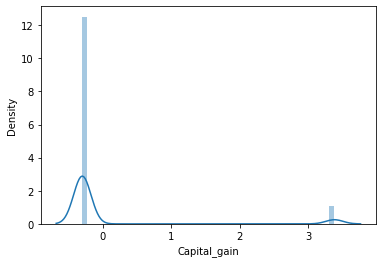

In [319]:
sn.distplot(new_data['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

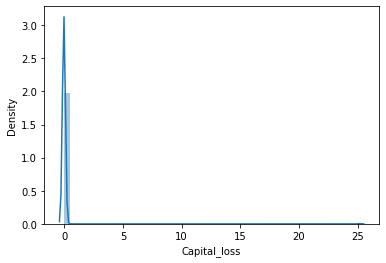

In [320]:
sn.distplot(new_data['Capital_loss'])

In [321]:
data.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [322]:
new_data.skew()

Age                0.492039
Workclass         -0.747931
Education         -0.926650
Education_num     -0.327125
Marital_status    -0.049122
Occupation         0.121813
Relationship       0.744606
Sex               -0.682700
Capital_gain       3.082869
Capital_loss      25.089449
Hours_per_week    -0.351580
Income             1.339534
dtype: float64

##### As shown in plot skewness removes after using yeo-johnson transformation skewness removal technique.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [323]:
x = new_data.drop(columns = 'Income', axis=1)
y = new_data['Income']

## Sampling

In [324]:
y.value_counts()

0    23624
1     6732
Name: Income, dtype: int64

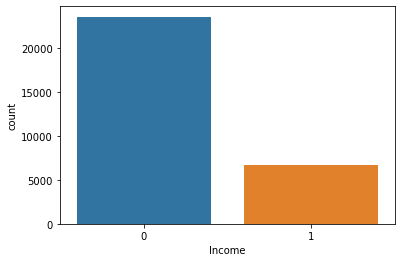

In [325]:
#visualization of target variable 
sn.countplot(new_data["Income"])
plt.show()

As we can see there is class imbalance in target varibale, so we need to balance that with sampling otherwise the model will get bias.

### Oversampling

In [326]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x, y)

In [327]:
y.value_counts()

1    23624
0    23624
Name: Income, dtype: int64

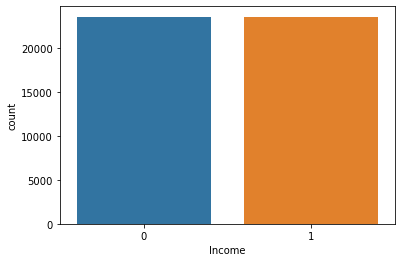

In [328]:
#visualization of target variable 
sn.countplot(y)
plt.show()

## Scalling technique

In [330]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.171373,Age
1,1.066605,Workclass
2,1.086598,Education
3,1.164783,Education_num
4,1.140033,Marital_status
5,1.078249,Occupation
6,1.932750,Relationship
7,1.765955,Sex
8,1.035367,Capital_gain
9,1.002422,Capital_loss


as we have saw in the table vif value is not greater than 5, so we can proceed further.

## Finding best random state 

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [333]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8569312169312169 on Random_state  44


In [334]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.25, random_state = 44)

## 1.Logistic Regression Model

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [336]:
pred_test=Log_reg.predict(x_test)

In [337]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7671012529630884
[[4382 1431]
 [1320 4679]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5813
           1       0.77      0.78      0.77      5999

    accuracy                           0.77     11812
   macro avg       0.77      0.77      0.77     11812
weighted avg       0.77      0.77      0.77     11812



In [338]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7571116363479578

###### The Accuracy score for logistic regression model is : 76.71%
###### Cross validation score for logistic regression is : 75.71%

In [ ]:
nni

## 2.Random forest Classifier

In [339]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [340]:
Rfr =RandomForestClassifier(criterion = "entropy", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  88.24077209617339
Cross Val Score:  87.80272630058649


###### The Accuracy score for Random Forest Classifier model is : 88.24%
###### Cross validation score for Random Forest Classifier is : 87.80%

## 3.Decision Tree Classifier

In [341]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [342]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.8535387741280054


In [343]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[4887  926]
 [ 804 5195]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5813
           1       0.85      0.87      0.86      5999

    accuracy                           0.85     11812
   macro avg       0.85      0.85      0.85     11812
weighted avg       0.85      0.85      0.85     11812



In [344]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8554020452879592

###### The Accuracy score for Decision tree Classifier model is : 85.35%
###### Cross validation score for Decision tree Classifier is : 85.54%

## 4.Support vector Classifier

In [345]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [346]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.8354216051473078


In [347]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[4508 1305]
 [ 639 5360]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      5813
           1       0.80      0.89      0.85      5999

    accuracy                           0.84     11812
   macro avg       0.84      0.83      0.83     11812
weighted avg       0.84      0.84      0.83     11812



In [348]:
cv_score= cross_val_score(sv, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7709321162173316

###### The Accuracy score for SVC model is : 83.54%
###### Cross validation score for SVC is : 77.09%

## Comparison of all model

#### The difference between Cross validation score  and logistic regression model is: 1%
#### The difference between Cross validation score  and Random Forest Classifier model is: 0.44%
#### The difference between Cross validation score  and Decision tree Classifier  model is: -0.19%
#### The difference between Cross validation score  and SVC model is: 6.45%

### as shown in above  Random Forest Classifier is having minimum difference, so Random Forest Classifier is best model

# Hyper parameter tuning

## Hyper parameter tunning Random Forest Classifier model

In [368]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['gini', 'entropy']}

In [369]:
GCV=GridSearchCV(RandomForestClassifier(),Parameters,cv=5)

In [370]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [371]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [374]:
mod = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'sqrt', n_estimators= 200)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

84.36335929563155


## Hyper parameter tunning  Decision tree Classifier model

In [363]:
# Decision tree Classifier
Parameters = {'max_depth': [2, 3, 5, 10, 20],
              'min_samples_leaf': [1, 10, 20, 50, 100],
              'criterion': ["gini", "entropy"],
              'splitter' : ["best", "random"]
             }

In [364]:
GCV=GridSearchCV(DecisionTreeClassifier(),Parameters,cv=5)

In [365]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 20, 50, 100],
                         'splitter': ['best', 'random']})

In [366]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [367]:
mod = DecisionTreeClassifier( criterion= 'gini', max_depth= 20, min_samples_leaf= 1, splitter='best')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

85.734845919404


## Hyper parameter tunning logistic regression model

In [349]:
#Logistic Regression

Parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

In [350]:
GCV=GridSearchCV(LogisticRegression(),Parameters,cv=5)

In [351]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [352]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [353]:
mod = LogisticRegression( C= 1, penalty='l2', solver='liblinear')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

76.71012529630885


after hyper parameter tunning of logistic regression accuracy score is: 76.71%

## Boosting of model with adaboost

In [375]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [376]:
ada.fit(x_train, y_train)
y_pred = ada.predict(x_train)

In [377]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 0.8395417089965007


after boosting of model the model accuracy raise to : 85.69%

## ROC AUC curve to choose best model

In [378]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [379]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [380]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [382]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## find ROC AUC Score

In [383]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.7668954774760757

In [384]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.8799068438122335

In [385]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.8531110624062666

In [386]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

0.8344927147815535

## Ploting AUC ROC curve

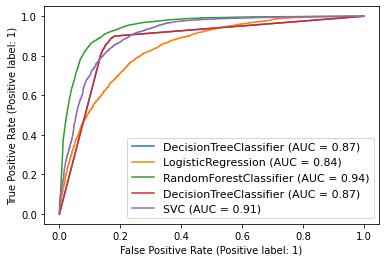

In [387]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

## Saving the model 

In [389]:
import joblib
joblib.dump(mod,"CensusIncome.pkl")

['CensusIncome.pkl']

## Loding model

In [390]:
model = joblib.load("CensusIncome.pkl")

In [391]:
prediction = model.predict(x_test)

In [392]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [393]:
prediction.to_csv('CensusIncomeResults.csv', index = False)
#prediction saving

#### model saved